In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
D = 3
N = 1e7
true_nlist = [1.5] + list(range(2, 21))
true_nlist = [1.5, 2, 4, 8, 16]
#true_nlist = list(range(2, 21))
m = 2/3
nlist = [round((tnn-2*m)/(1-m),4) for tnn in true_nlist]
s = 1.0
sc = 1.0
c = s / sc
L = 1.0
num_empty = 200
res_dir = 'nsc-friday'
randix = 0

nsc-friday/D=3_n=0.5_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0
nsc-friday/D=3_n=2.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0
nsc-friday/D=3_n=8.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0
nsc-friday/D=3_n=20.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0
nsc-friday/D=3_n=44.0_N=1.00e+07_s=1.0_L=1.0_c=1.00000e+00_r=0


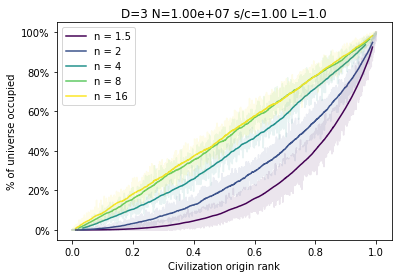

In [90]:
plot_data = []
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
fig = plt.figure()
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    print(fout)
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.txt')
    plt.plot(
        np.linspace(0,1, res.PctEmpty.shape[0]), 
        1-res.PctEmpty.rolling(window=max(75,int(res.shape[0]/40)), win_type='gaussian', center=True).mean(std=1000),
        color=mycols[nix]
    )
leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg);
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    res = pd.read_csv(fout+'.csv')
    plt.plot(
        np.linspace(0,1, res.PctEmpty.shape[0]), 
        1-res.PctEmpty,
        color=mycols[nix], alpha=0.1
    )
plt.xlabel('Civilization origin rank');
plt.ylabel('% of universe occupied');
plt.gca().set_yticks(np.linspace(0, 1, 6));
plt.gca().set_yticklabels([f'{100*fo:.0f}%' for fo in list(np.linspace(0, 1, 6))]);
plt.gca().set_title(f'D={D} N={N:.2e} s/c={s/c:.2f} L={L:.1f}');
fig.savefig('figures-friday/plotB.png', dpi=200);

In [41]:
np.power(20, 1.5)

89.44271909999159

In [75]:
np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [81]:
[f'{100*fo:.0f}%' for fo in list(np.linspace(0, 1, 6))]

['0%', '20%', '40%', '60%', '80%', '100%']